Es necesario clonar el repositorio [pytrend](https://github.com/ItrendCL/pytrend) para ejecutar

In [1]:
import pandas as pd
from pytrend import pytrend
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
with open("pdd-secrets.json") as f:
    keys = json.load(f)


In [3]:
#https://www.plataformadedatos.cl/datasets/es/492F65B350AAF9D1


session = pytrend.itrend_developer_tools()

session.set_credentials(
    access_key_id = keys["access_key_id"],
    secret_access_key = keys["secret_access_key"]
)

# Conjunto de datos
dataset_id = 'itrend-ds:492F65B350AAF9D1'

# Obtener formatos disponibles
dataset_formats = session.get_dataset_formats(dataset_id)
fmt = dataset_formats[0] # Escoger el formato que más le acomode: [csv, xlsx, shp, geojson]

# Descargar archivo
response = session.download_file(dataset_id, fmt)

In [4]:
response

{'filename': '492F65B350AAF9D1.csv', 'delimiter': ';'}

Cambiamos el nombre del archivo a Incendios

In [5]:
df = pd.read_csv("incendios.csv", delimiter=';')
df

,FireID,FireSeason,RegionCode,Region_CONAF,FireName_CONAF,Area_CONAF [ha],IgnitionDate_CONAF,ControlDate_CONAF,Latitude [°],Longitude [°],...,Height [pixels],TotalArea [m2],AreaUnchS [m2],AreaLowS [m2],AreaModS [m2],AreaHighS [m2],FireScarPolygons,SeverityPolygons,OverlapIDs,Observations
0,ID10000,1986,CL-BI,BioBio,RAPELCO,51.0,1986-01-04,1986-01-04,-37.6710,-72.3978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID100000,2003,CL-ML,Maule,MAITENHUAPI,50.0,2003-02-09,2003-02-09,-35.3283,-71.5799,...,46.0,4.278272e+05,0.0,0.0,1.787481e+05,2.490791e+05,1.0,57.0,NaN,NaN
2,ID10002,1986,CL-BI,BioBio,LAs chilcas,87.0,1986-02-03,1986-02-03,-36.6711,-71.9708,...,118.0,3.227681e+06,0.0,0.0,7.103731e+05,2.517308e+06,16.0,423.0,NaN,The ignition point is located in the current C...
3,ID100027,2003,CL-ML,Maule,LAS CATALINAS II,80.0,2003-02-15,2003-02-16,-35.5755,-72.1725,...,114.0,1.155078e+06,0.0,0.0,5.399041e+05,6.151739e+05,6.0,122.0,NaN,NaN
4,ID10003,1986,CL-BI,BioBio,NAHUELTORO 1,53.0,1986-02-06,1986-02-06,-36.4938,-71.8524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,ID9998,1986,CL-BI,BioBio,PUYARAL,1045.0,1986-01-04,1986-01-05,-36.5404,-72.2129,...,223.0,9.943561e+06,0.0,0.0,1.911105e+06,8.032456e+06,6.0,730.0,NaN,The ignition point is located in the current C...
12246,ID99985,2003,CL-ML,Maule,CUATRO ESQUINAS,18.0,2003-02-06,2003-02-06,-35.8940,-71.6757,...,38.0,2.611790e+05,0.0,0.0,1.746033e+04,2.437186e+05,2.0,23.0,NaN,NaN
12247,ID9999,1986,CL-ML,Maule,LA REINA,40.0,1986-02-22,1986-02-22,-36.1722,-71.7295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,ID99995,2003,CL-ML,Maule,EL OLVIDO,14.0,2003-02-09,2003-02-10,-35.9472,-72.4200,...,20.0,1.781278e+05,0.0,0.0,1.279616e+05,5.016616e+04,4.0,30.0,NaN,NaN


In [6]:
df["Region_CONAF"].unique()

array(['BioBio', 'Maule', 'Araucania', 'Valparaiso', 'Ohiggins',
       'Los Rios', 'Coquimbo', 'Los Lagos', 'Metropolitana'], dtype=object)

In [7]:
df.columns

Index(['FireID', 'FireSeason', 'RegionCode', 'Region_CONAF', 'FireName_CONAF',
       'Area_CONAF [ha]', 'IgnitionDate_CONAF', 'ControlDate_CONAF',
       'Latitude [°]', 'Longitude [°]', 'FireScar', 'FolderLocation',
       'FireScarImgName', 'PreFireImgName', 'PostFireImgName', 'RdNBRImgName',
       'SeverityImgName', 'FireScarVectorName', 'SeverityVectorName',
       'Threshold', 'NorthBoundLatitude [°]', 'SouthBoundLatitude [°]',
       'WestBoundLongitude [°]', 'EastBoundLongitude [°]', 'Width [pixels]',
       'Height [pixels]', 'TotalArea [m2]', 'AreaUnchS [m2]', 'AreaLowS [m2]',
       'AreaModS [m2]', 'AreaHighS [m2]', 'FireScarPolygons',
       'SeverityPolygons', 'OverlapIDs', 'Observations'],
      dtype='object')

In [8]:
df["FireSeason"].max()

2018

## Explicación de las Causales de Incendios Forestales en Chile

In [9]:
df_causas = pd.read_csv("causas_incendios.csv")
df_causas

,causas,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,Total,%
0,ACCIDENTALES,"33.385,65","27.029,85","41.659,63","12.983,77","19.678,95","23.348,76","30.810,76","38.410,32","24.201,54",...,"49.733,16","28.233,59","239.819,58","20.506,85","47.466,91","34.703,36","10.747,30","26.621,57","839.020,58","47,41"
1,INTENCIONALES,"4.476,96","10.681,52","14.681,47","4.888,35","7.569,66","15.313,55","21.470,72","14.488,68","10.307,58",...,"57.318,71","11.593,84","152.333,97","14.624,98","23.370,53","56.489,73","22.150,13","86.868,79","589.423,30","33,31"
2,NATURALES,"6,33","103,77","18,06","5,09","3,42","85,23","574,37","5,12","6,96",...,"8.348,05","8,04","82,26","96,94","2.103,94","8,63","108,29","32,74","13.440,54","0,76"
3,DESCONOCIDAS,"4.118,79","12.872,15","8.940,92","1.445,00","16.132,07","3.289,07","11.366,67","5.460,00","12.519,38",...,"13.254,48","2.261,23","177.961,59","4.325,23","7.122,80","11.089,95","2.617,17","11.811,98","327.652,59","18,52"
4,TOTAL,"41.987,73","50.687,29","65.300,08","19.322,21","43.384,10","42.036,61","64.222,52","58.364,12","47.035,46",...,"128.654,41","42.096,71","570.197,39","39.554,00","80.064,19","102.291,67","35.622,88","125.335,08","1.769.537,01","100,00"


In [10]:
# Obtenemos los porcentajes de las causas de incendios
prc_causas = df_causas["%"][:4].replace(",", ".", regex=True).astype(float)
prc_causas

0    47.41
1    33.31
2     0.76
3    18.52
Name: %, dtype: float64

Text(0.5, 1.0, 'Porcentaje de causas de incendios')

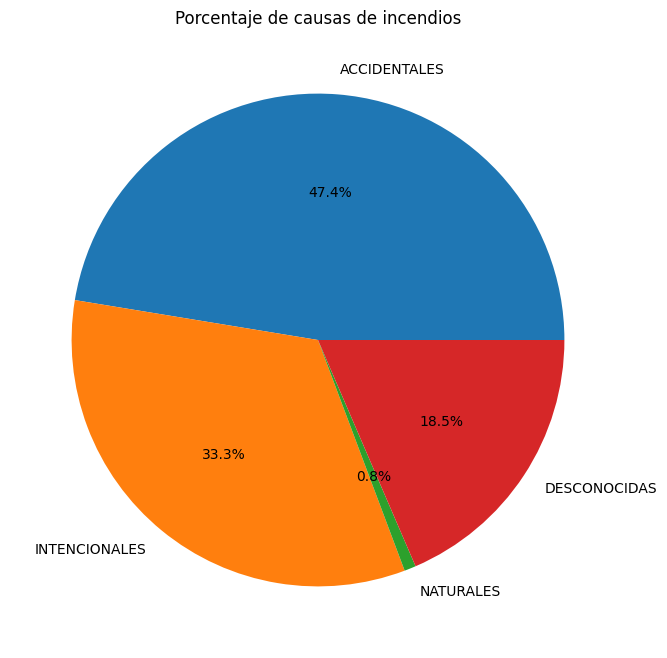

In [11]:
# Hacemos un gráfico de torta con los porcentajes de las causas de incendios
plt.figure(figsize=(8, 8))
plt.pie(prc_causas, labels=df_causas["causas"][:4], autopct='%1.1f%%')
plt.title("Porcentaje de causas de incendios")

Podemos ver que en gran parte, la cantidad de incendios forestales generados en Chile fue debido a accidentes, posteriormente le sigue las de tipo intencional, luego las causas desconocidadas y por último las causas naturales.

Analizamos el comportamiento de la cantidad de causales por año

In [12]:
# Obtenemos las causas por año
anhos = df_causas.columns[1:21]
accidentales = []
intencionales = []
naturales = []
desconocidas = []
for year in anhos:
    accidentales.append(round(float(df_causas[year][0].replace(".", "").replace(",", "."))))
    intencionales.append(round(float(df_causas[year][1].replace(".", "").replace(",", "."))))
    naturales.append(round(float(df_causas[year][2].replace(".", "").replace(",", "."))))
    desconocidas.append(round(float(df_causas[year][3].replace(".", "").replace(",", "."))))

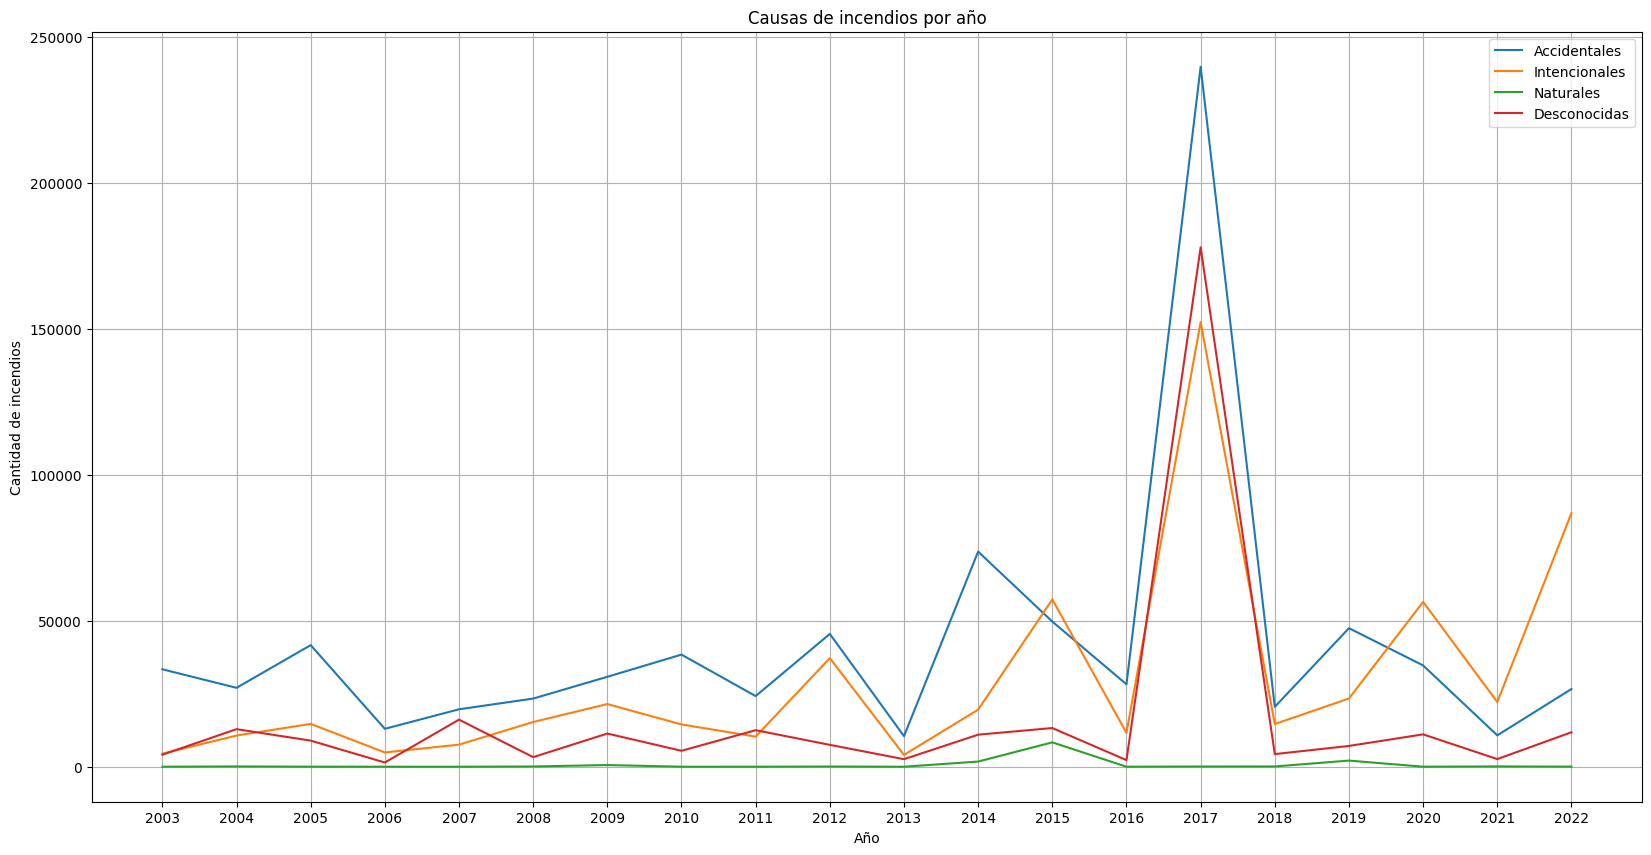

In [13]:
# Gráficamos las causas por año
plt.figure(figsize=(20, 10))
plt.plot(anhos, accidentales, label="Accidentales")
plt.plot(anhos, intencionales, label="Intencionales")
plt.plot(anhos, naturales, label="Naturales")
plt.plot(anhos, desconocidas, label="Desconocidas")
plt.legend()
plt.title("Causas de incendios por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de incendios")
plt.grid()
plt.show()

Como podemos apreciar, existió un aumento significativo en la cantidad de incendios forestales en el año 2017, esto se debe a que en el mes de enero de ese año se produjo el incendio forestal más grande de la historia de Chile, el cual afectó a las regiones de O'Higgins (VI), Maule (VII), Biobío (VIII) y La Araucanía (IX).

## Hectareas Dañadas por Incendios Forestales en Chile

Analizamos los daños por hectaria (ha) por año:

In [14]:
df_danos = pd.read_csv("danos_region.csv")
df_danos

,Año,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
0,1976 - 1977,NaN,NaN,NaN,"0,00","4,77","53,78","3,93","15,95","3,77",NaN,"3,60","4,07","0,00","13,00","0,67","0,00","13,86"
1,1977 - 1978,NaN,NaN,NaN,"0,00","2,69","2,46","5,68","12,19","16,31",NaN,"6,22","19,19","0,00","12,54","13,06","51,63","8,86"
2,1978 - 1979,NaN,NaN,NaN,"0,00","22,30","2,63","8,75","2,86","3,83",NaN,"6,33","97,01","0,00","27,53","5,54","117,12","16,15"
3,1979 - 1980,NaN,NaN,NaN,"0,00","3,61","2,47","8,41","29,83","13,11",NaN,"6,83","11,87","0,00","3,69","3,33","8,30","7,57"
4,1980 - 1981,NaN,NaN,NaN,"0,41","4,03","6,32","5,98","12,93","18,87",NaN,"4,51","3,38","0,00","2,15","89,46","32,64","7,64"
5,1981 - 1982,NaN,NaN,NaN,"0,25","13,73","6,79","10,45","4,71","5,50",NaN,"3,55","4,47","0,00","3,74","1,66","104,04","5,94"
6,1982 - 1983,NaN,NaN,NaN,"1,62","117,55","6,26","7,14","4,01","14,28",NaN,"4,36","8,24","0,00","23,74","5,33","18,29","9,57"
7,1983 - 1984,NaN,NaN,NaN,"1,38","41,00","32,91","9,59","12,19","11,55",NaN,"3,77","2,68","0,00","11,91","189,32","23,47","12,83"
8,1984 - 1985,NaN,NaN,NaN,"3,06","29,98","7,52","5,50","4,01","17,53",NaN,"2,79","3,46","3,36","2,42","3,37","525,50","9,11"
9,1985 - 1986,NaN,NaN,NaN,"4,21","5,90","11,66","11,52","54,61","7,29",NaN,"9,29","12,84","2,81","2,33","45,74","40,13","12,44"


In [18]:
# Reemplazamos las comas por puntos de cada columna los pasamos los valores a float
for col in df_danos.columns[1:]:
    df_danos[col] = df_danos[col].str.replace(".", "").str.replace(",", ".").astype(float)

# Reemplazamos valores nulos por 0
df_danos = df_danos.fillna(0)

# Sumamos la cantidad de hectareas quemadas por año, sin contar la primera columna
df_danos["Total"] = df_danos[df_danos.columns[1:]].sum(axis=1)

# Eliminamos la columna "TOTAL" ya que presenta sumas erróneas
df_danos = df_danos.drop("TOTAL", axis=1)

AttributeError: Can only use .str accessor with string values!

In [16]:
# Analizamos el nuestro dataframe limpio
df_danos

,Año,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL,Total
0,1976 - 1977,0.00,0.00,0.00,0.00,4.77,53.78,3.93,15.95,3.77,0.00,3.60,4.07,0.00,13.00,0.67,0.00,13.86,117.40
1,1977 - 1978,0.00,0.00,0.00,0.00,2.69,2.46,5.68,12.19,16.31,0.00,6.22,19.19,0.00,12.54,13.06,51.63,8.86,150.83
2,1978 - 1979,0.00,0.00,0.00,0.00,22.30,2.63,8.75,2.86,3.83,0.00,6.33,97.01,0.00,27.53,5.54,117.12,16.15,310.05
3,1979 - 1980,0.00,0.00,0.00,0.00,3.61,2.47,8.41,29.83,13.11,0.00,6.83,11.87,0.00,3.69,3.33,8.30,7.57,99.02
4,1980 - 1981,0.00,0.00,0.00,0.41,4.03,6.32,5.98,12.93,18.87,0.00,4.51,3.38,0.00,2.15,89.46,32.64,7.64,188.32
5,1981 - 1982,0.00,0.00,0.00,0.25,13.73,6.79,10.45,4.71,5.50,0.00,3.55,4.47,0.00,3.74,1.66,104.04,5.94,164.83
6,1982 - 1983,0.00,0.00,0.00,1.62,117.55,6.26,7.14,4.01,14.28,0.00,4.36,8.24,0.00,23.74,5.33,18.29,9.57,220.39
7,1983 - 1984,0.00,0.00,0.00,1.38,41.00,32.91,9.59,12.19,11.55,0.00,3.77,2.68,0.00,11.91,189.32,23.47,12.83,352.60
8,1984 - 1985,0.00,0.00,0.00,3.06,29.98,7.52,5.50,4.01,17.53,0.00,2.79,3.46,3.36,2.42,3.37,525.50,9.11,617.61
9,1985 - 1986,0.00,0.00,0.00,4.21,5.90,11.66,11.52,54.61,7.29,0.00,9.29,12.84,2.81,2.33,45.74,40.13,12.44,220.77


In [17]:
# Obtenemos los daños por año y región
anhos = df_danos["Año"].unique()
anhos

array(['1976 - 1977', '1977 - 1978', '1978 - 1979', '1979 - 1980',
       '1980 - 1981', '1981 - 1982', '1982 - 1983', '1983 - 1984',
       '1984 - 1985', '1985 - 1986', '1986 - 1987', '1987 - 1988',
       '1988 - 1989', '1989 - 1990', '1990 - 1991', '1991 - 1992',
       '1992 - 1993', '1993 - 1994', '1994 - 1995', '1995 - 1996',
       '1996 - 1997', '1997 - 1998', '1998 - 1999', '1999 - 2000',
       '2000 - 2001', '2001 - 2002', '2002 - 2003', '2003 - 2004',
       '2004 - 2005', '2005 - 2006', '2006 - 2007', '2007 - 2008',
       '2008 - 2009', '2009 - 2010', '2010 - 2011', '2011 - 2012',
       '2012 - 2013', '2013  - 2014', '2014 - 2015', '2015 - 2016',
       '2016 - 2017', '2017 - 2018', '2018 - 2019', '2019 - 2020',
       '2020 - 2021', '2021 - 2022'], dtype=object)

## ¿Qué sucedió con la cantidad de aves avistadas en Chile en el año 2017 en adelante?